In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r"C:\Users\vishnu\Downloads\file.csv.zip")

In [2]:
# Display basic information about the dataset
print("Initial Data Info:")
df.info()

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date             

In [3]:
# Display the first few rows of the dataset to inspect the data
df.head()


,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [4]:
# Drop unnecessary columns 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [7]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [8]:
# Set Seaborn style for the plots
sns.set(style="whitegrid")

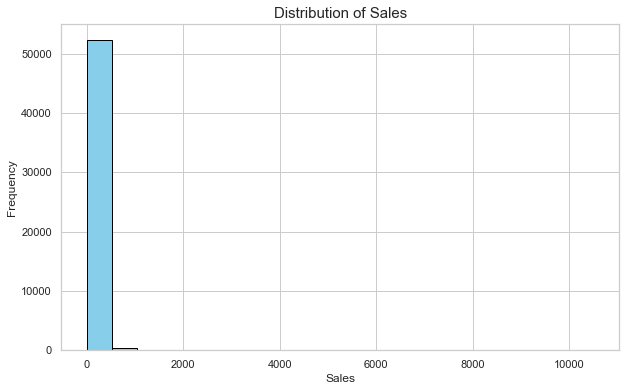

In [9]:
# Calculate total sales as Quantity * Avg_Price
df['Sales'] = df['Quantity'] * df['Avg_Price']

# Now you can create a histogram for Sales
plt.figure(figsize=(10, 6))
df['Sales'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales', fontsize=15)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


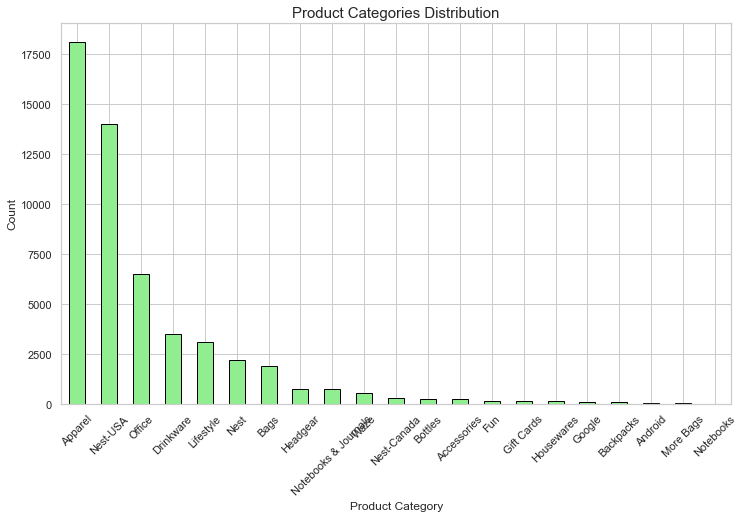

In [10]:
plt.figure(figsize=(12, 7))
df['Product_Category'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Product Categories Distribution', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


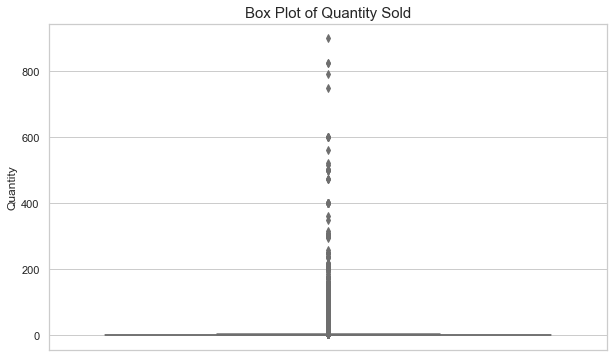

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Quantity'], color='lightcoral')
plt.title('Box Plot of Quantity Sold', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.show()


In [12]:
# Calculate total sales as Quantity * Avg_Price
df['Sales'] = df['Quantity'] * df['Avg_Price']


In [13]:
# Identifying Outliers in Sales using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nOutliers in Sales:")
print(outliers[['CustomerID', 'Sales', 'Product_Category']])


Outliers in Sales:
       CustomerID    Sales      Product_Category
6         17850.0   307.42              Nest-USA
40        12431.0   306.39              Nest-USA
41        12431.0   614.84              Nest-USA
47        17511.0   307.42              Nest-USA
50        17511.0   307.42              Nest-USA
...           ...      ...                   ...
52615     14606.0   359.70  Notebooks & Journals
52769     12748.0  1299.35                Google
52790     14114.0   500.00            Gift Cards
52892     15640.0   799.80           Accessories
52893     15640.0   959.80           Accessories

[3632 rows x 3 columns]


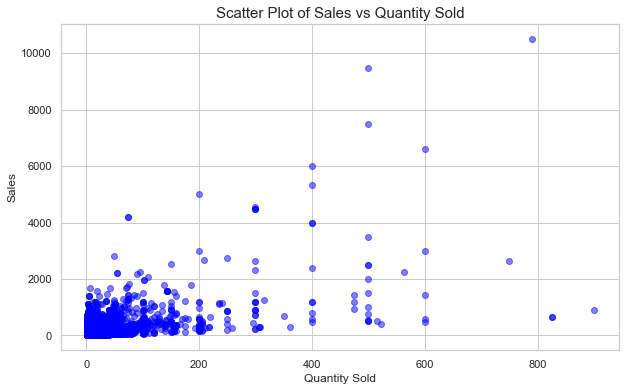

In [14]:
#  Scatter Plot to Explore Sales vs Quantity Sold
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Sales vs Quantity Sold', fontsize=15)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

# Sales and Quantities Sold

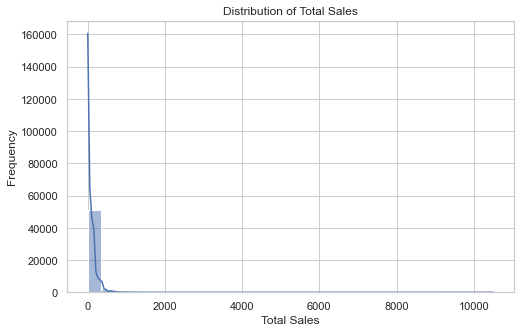

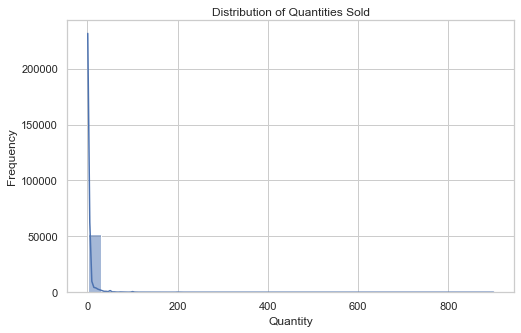

In [15]:
# Total sales (assuming sales are derived from quantity * price)
df['Total_Sales'] = df['Quantity'] * df['Avg_Price']

# Distribution of total sales
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Sales'], kde=True, bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# Distribution of quantities sold
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


# Product Categories

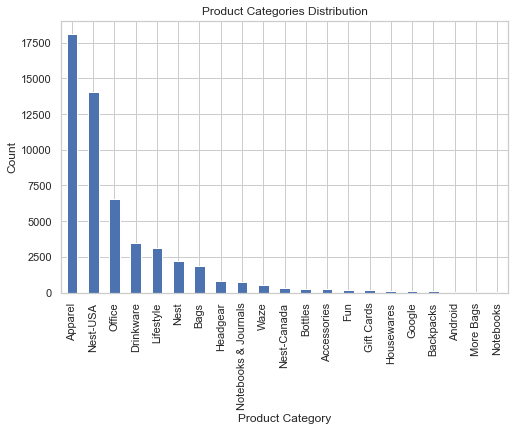

In [16]:
# Frequency of product categories
plt.figure(figsize=(8,5))
df['Product_Category'].value_counts().plot(kind='bar')
plt.title('Product Categories Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


# Payment Methods (Offline vs Online Spend)

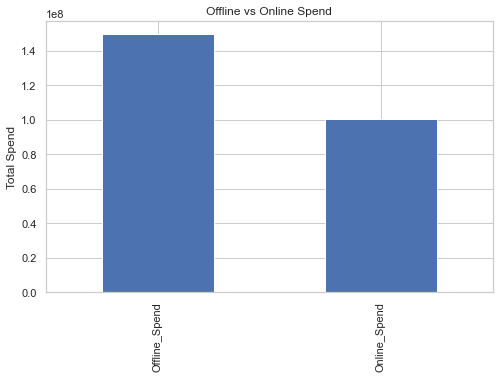

In [17]:
# Distribution of Offline vs Online Spend
plt.figure(figsize=(8,5))
df[['Offline_Spend', 'Online_Spend']].sum().plot(kind='bar')
plt.title('Offline vs Online Spend')
plt.ylabel('Total Spend')
plt.show()


#  Impact of Customer Demographics on Purchasing Behavior

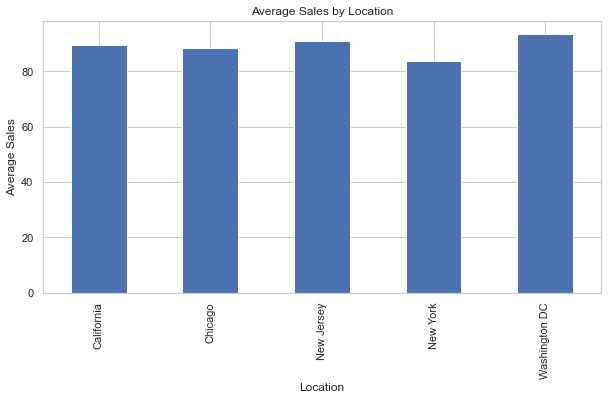

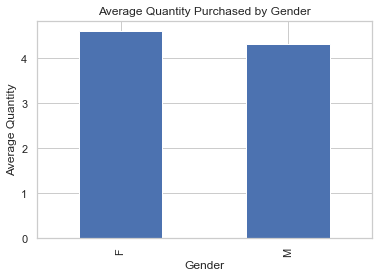

In [18]:
# Average sales per location
location_sales = df.groupby('Location')['Total_Sales'].mean()
plt.figure(figsize=(10,5))
location_sales.plot(kind='bar')
plt.title('Average Sales by Location')
plt.xlabel('Location')
plt.ylabel('Average Sales')
plt.show()

# Average quantity purchased by gender
gender_quantity = df.groupby('Gender')['Quantity'].mean()
plt.figure(figsize=(6,4))
gender_quantity.plot(kind='bar')
plt.title('Average Quantity Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Quantity')
plt.show()


#  Bivariate and Multivariate Analysis

# Sales vs. Month

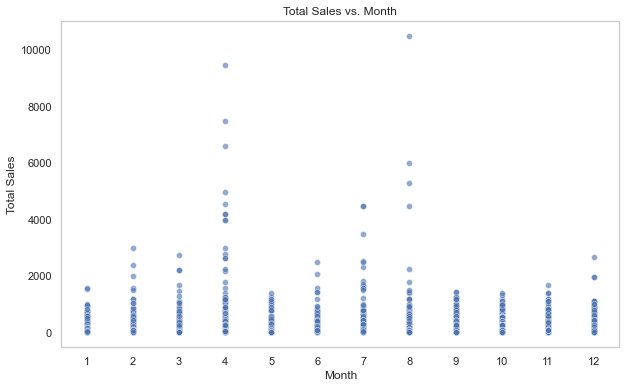

In [19]:
# Calculate Total Sales
df['Total_Sales'] = df['Quantity'] * df['Avg_Price']

# Scatter plot of Total Sales vs. Month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Month', y='Total_Sales', data=df, alpha=0.6)
plt.title('Total Sales vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13)) 
plt.grid()
plt.show()





#  Delivery_Charges vs. Total_Sales

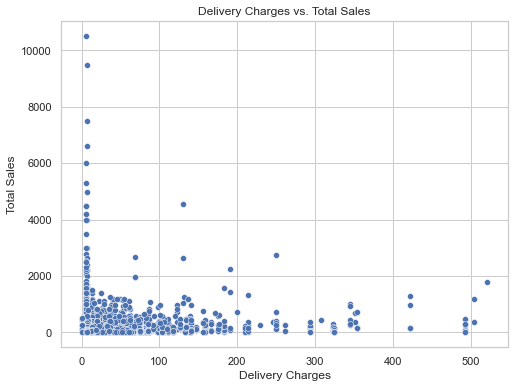

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Delivery_Charges', y='Total_Sales', data=df)
plt.title('Delivery Charges vs. Total Sales')
plt.xlabel('Delivery Charges')
plt.ylabel('Total Sales')
plt.show()



# Analyzing how total sales vary by product category

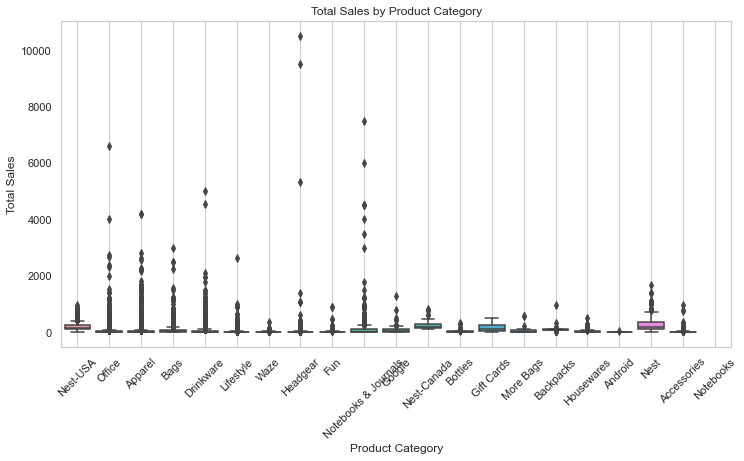

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Total_Sales', data=df)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid()
plt.show()


# Average Quantity Sold by Location

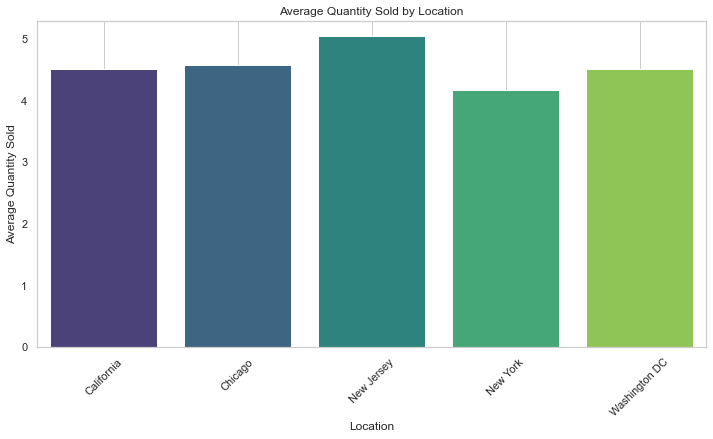

In [22]:
avg_quantity_by_location = df.groupby('Location')['Quantity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Quantity', data=avg_quantity_by_location, palette='viridis')
plt.title('Average Quantity Sold by Location')
plt.xlabel('Location')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# visualizing the relationships between multiple numerical variables.

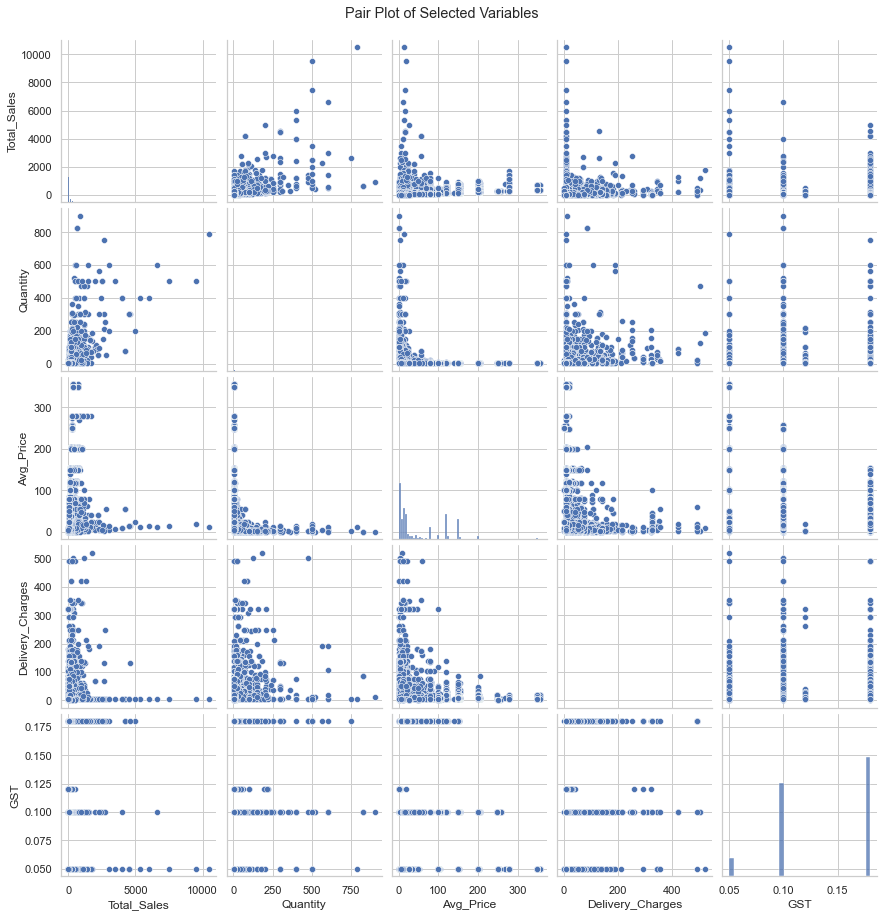

In [23]:
sns.pairplot(df[['Total_Sales', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02) 

# Title above the plot
plt.show()


In [24]:
# Scikit-learn Libraries for EDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Correlation and Statistical Libraries
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Simulating a dataset
np.random.seed(42)
n_customers = 500

df = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Age': np.random.randint(18, 65, n_customers),
    'SessionDuration': np.random.normal(30, 10, n_customers).round(1),
    'PageViews': np.random.poisson(5, n_customers),
    'ItemsAddedToCart': np.random.poisson(3, n_customers),
    'PurchaseMade': np.random.choice([0, 1], n_customers, p=[0.7, 0.3]),
    'TotalSpent': np.random.normal(50, 20, n_customers).round(2),
    'DayOfWeek': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], n_customers)
})

# Set negative total spend to 0 if no purchase made
df['TotalSpent'] = np.where(df['PurchaseMade'] == 0, 0, df['TotalSpent'])

# Preview the dataset
df.head()


,CustomerID,Gender,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,DayOfWeek
0,1,Male,38,8.5,8,1,0,0.00,Saturday
1,2,Female,49,35.1,6,2,0,0.00,Monday
2,3,Male,40,17.8,2,2,0,0.00,Wednesday
3,4,Male,50,18.4,6,1,0,0.00,Thursday
4,5,Male,20,29.6,7,3,1,30.19,Friday


# data preprocessing

In [26]:
# Check for missing values
print(df.isnull().sum())

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'SessionDuration', 'PageViews', 'ItemsAddedToCart', 'TotalSpent']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender', 'DayOfWeek'], drop_first=True)

# Verifying the processed dataset
df.head()

CustomerID          0
Gender              0
Age                 0
SessionDuration     0
PageViews           0
ItemsAddedToCart    0
PurchaseMade        0
TotalSpent          0
DayOfWeek           0
dtype: int64


,CustomerID,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,Gender_Male,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,1,-0.205739,-2.092821,1.288307,-1.092433,0,-0.576842,1,0,1,0,0,0,0
1,2,0.623245,0.391872,0.424251,-0.496777,0,-0.576842,0,1,0,0,0,0,0
2,3,-0.055014,-1.224113,-1.303860,-0.496777,0,-0.576842,1,0,0,0,0,0,1
3,4,0.698607,-1.168067,0.424251,-1.092433,0,-0.576842,1,0,0,0,1,0,0
4,5,-1.562258,-0.121881,0.856279,0.098879,1,0.616463,1,0,0,0,0,0,0


# Multicollinearity Check

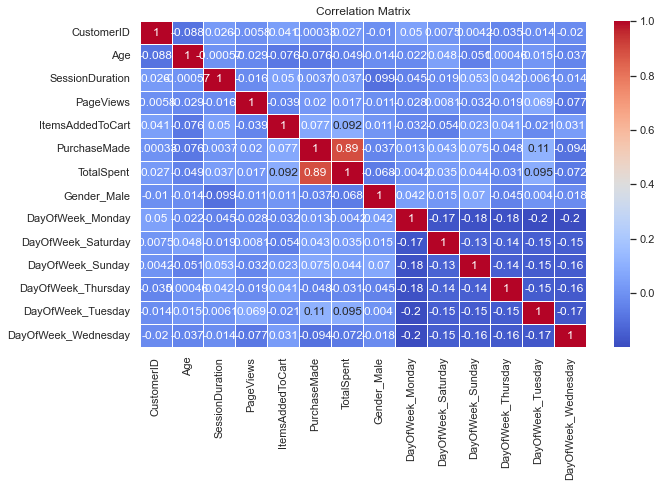

High Correlations (> 0.8):
 TotalSpent    PurchaseMade    0.889605
PurchaseMade  TotalSpent      0.889605
dtype: float64


In [27]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identifying high multicollinearity
high_corr = corr_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr > 0.8) & (high_corr < 1)]
print("High Correlations (> 0.8):\n", high_corr)

# Feature engineering

In [28]:
# Creating new features
df['PurchaseEfficiency'] = df['TotalSpent'] / (df['ItemsAddedToCart'] + 1)
df['PageViewEfficiency'] = df['PageViews'] / (df['SessionDuration'] + 1)

# Handling infinite values in efficiency
df.replace([np.inf, -np.inf], 0, inplace=True)

# Preview
df[['PurchaseEfficiency', 'PageViewEfficiency']].head()

,PurchaseEfficiency,PageViewEfficiency
0,6.240679,-1.178882
1,-1.146294,0.304806
2,-1.146294,5.817873
3,6.240679,-2.524297
4,0.560993,0.975129


# Multivariate Analysis Techniques

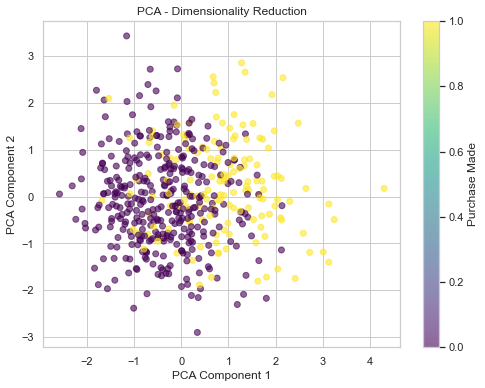

Explained Variance by PCA Components: [0.23276779 0.20741527]


In [29]:
# PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numerical_features])

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['PurchaseMade'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - Dimensionality Reduction')
plt.colorbar(label='Purchase Made')
plt.show()

# Explained variance ratio
print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)

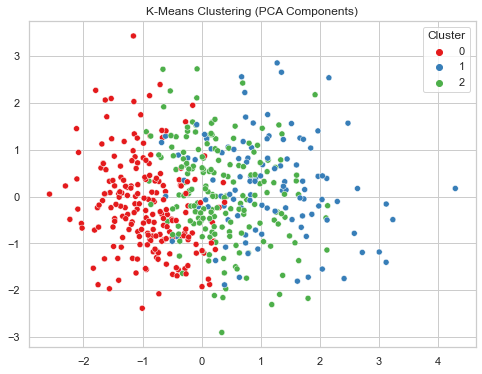

Silhouette Score: 0.18278432396879163


In [30]:
# Using K-Means clustering to identify customer segments
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[numerical_features])

# Adding cluster information to the dataset
df['Cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering (PCA Components)')
plt.show()

# Silhouette Score to evaluate clustering
sil_score = silhouette_score(df[numerical_features], df['Cluster'])
print(f'Silhouette Score: {sil_score}')

# t-SNE Visualisation

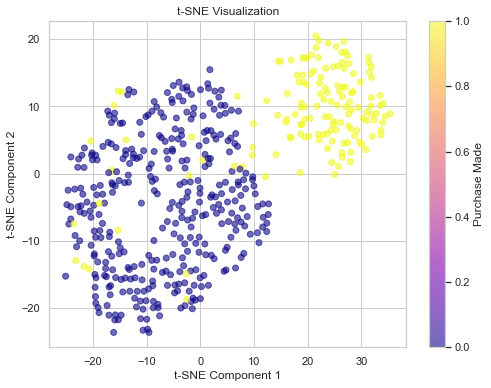

In [31]:
# t-SNE for high-dimensional visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df[numerical_features])

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['PurchaseMade'], cmap='plasma', alpha=0.6)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Purchase Made')
plt.show()


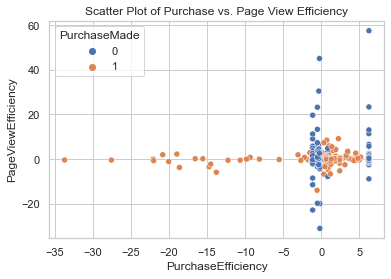

In [32]:
sns.scatterplot(data=df, x='PurchaseEfficiency', y='PageViewEfficiency', hue='PurchaseMade', palette='deep')
plt.title('Scatter Plot of Purchase vs. Page View Efficiency')
plt.show()

In [33]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
display(df.describe(include='all'))


Descriptive Statistics:


,CustomerID,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,Gender_Male,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PurchaseEfficiency,PageViewEfficiency,Cluster
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.0000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,2.660094e-16,1.767475e-16,5.750955e-17,-6.217249e-17,0.296000,1.172396e-16,0.488000,0.188000,0.11400,0.124000,0.126000,0.1420,0.14600,0.247354,0.403362,0.972000
std,144.481833,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,0.456948,1.001002e+00,0.500357,0.391103,0.31813,0.329912,0.332182,0.3494,0.35346,4.326366,5.049408,0.881345
min,1.000000,-1.712983e+00,-2.681301e+00,-2.167916e+00,-1.688088e+00,0.000000,-8.894964e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-33.729465,-31.034007,0.000000
25%,125.750000,-8.839985e-01,-6.776673e-01,-8.718323e-01,-4.967768e-01,0.000000,-5.768418e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-0.524937,-0.629249,0.000000
50%,250.500000,2.034779e-02,-2.847122e-02,-7.776502e-03,9.887884e-02,0.000000,-5.768418e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-0.251875,-0.005107,1.000000
75%,375.250000,8.493319e-01,6.650943e-01,8.562793e-01,6.945345e-01,1.000000,4.850376e-01,1.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,1.189042,0.765325,2.000000
max,500.000000,1.753678e+00,2.876564e+00,4.312502e+00,3.672813e+00,1.000000,3.459209e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.00000,6.240679,57.497917,2.000000


In [34]:
# Step 1: Handling Missing Values
df_cleaned = df.copy()
df_cleaned.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True) 
df_cleaned.fillna("Unknown", inplace=True) 

# Vizualization Techniques

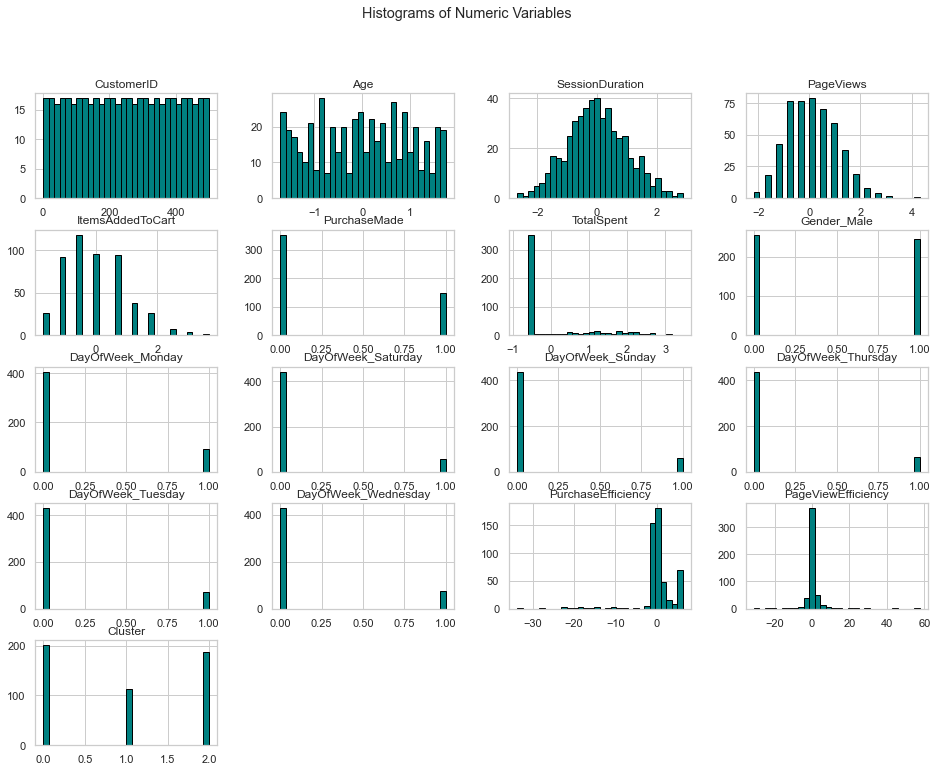

In [35]:
# Histograms
df_cleaned.hist(figsize=(16, 12), bins=30, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numeric Variables")
plt.show()

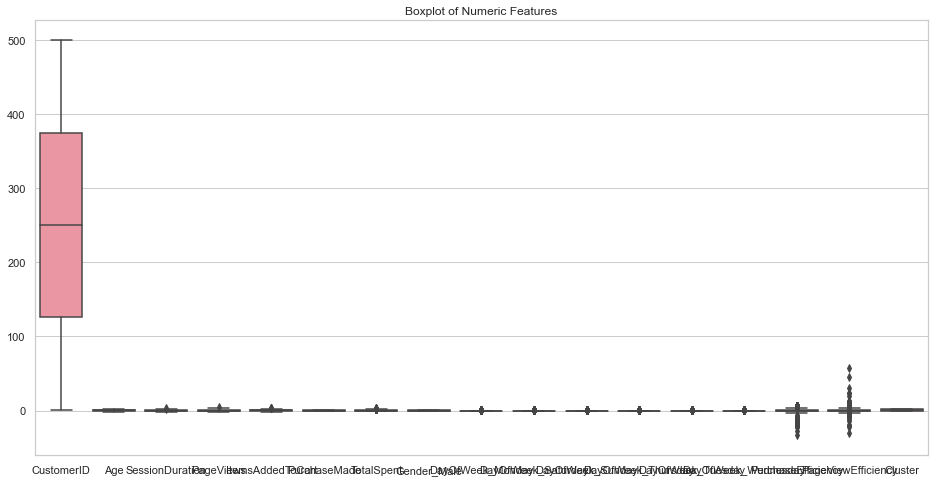

In [36]:
# Box Plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned.select_dtypes(include=np.number))
plt.title("Boxplot of Numeric Features")
plt.show()

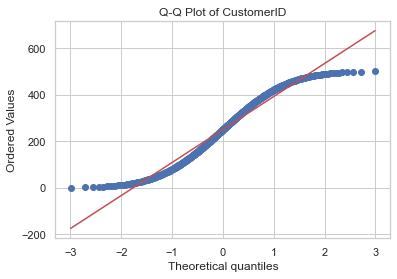

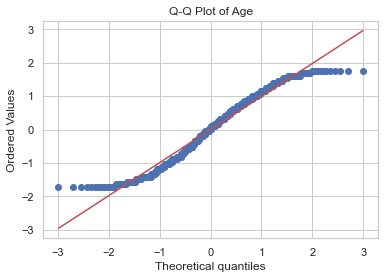

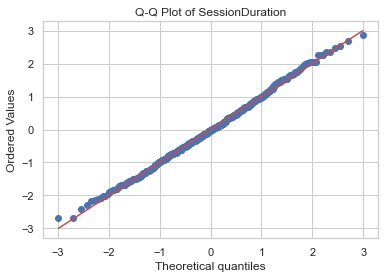

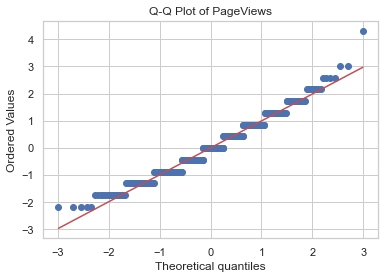

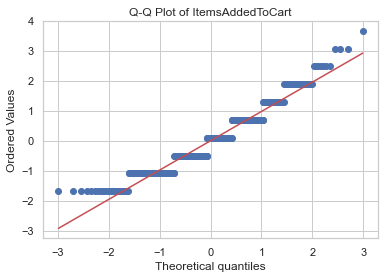

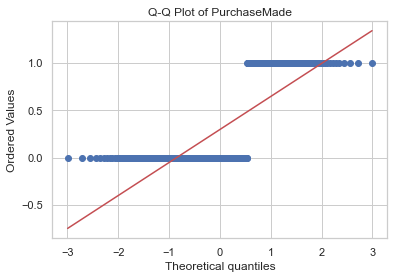

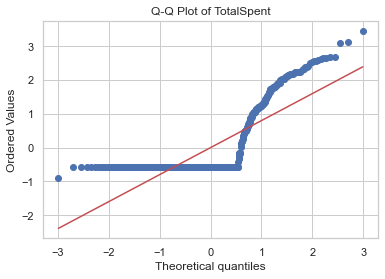

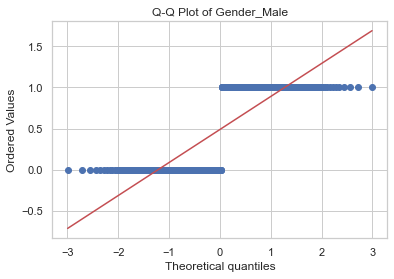

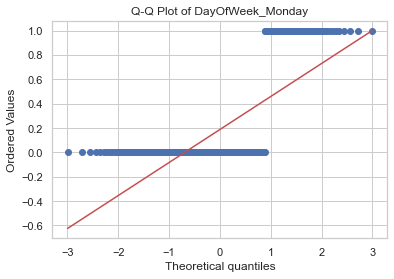

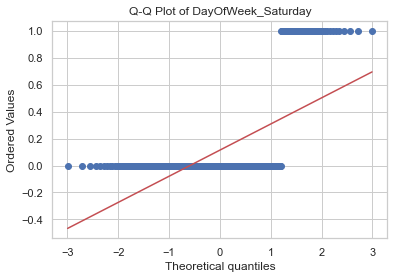

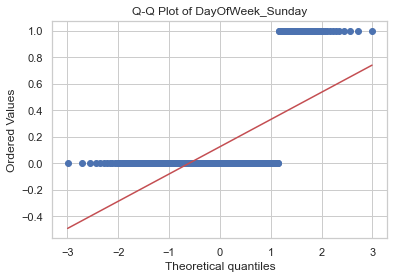

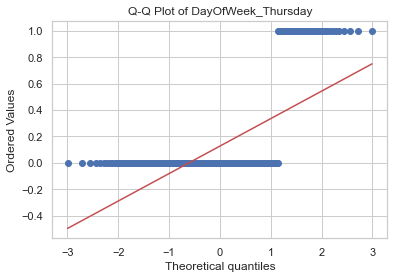

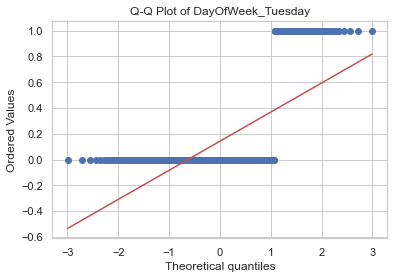

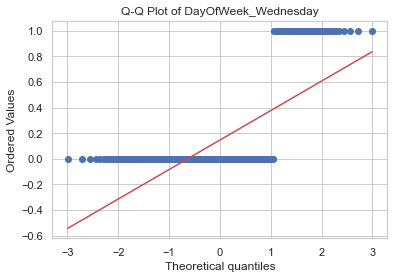

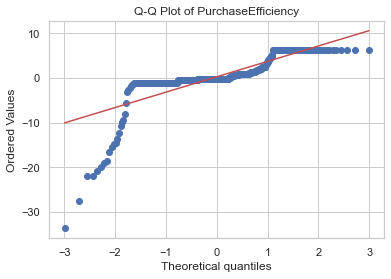

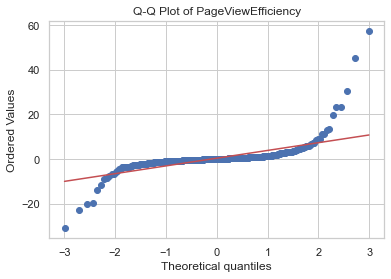

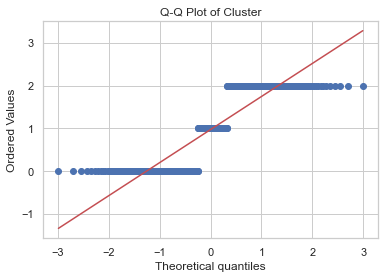

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np

# Loop through all numeric columns
for column in df_cleaned.select_dtypes(include=np.number).columns:
    data = df_cleaned[column].dropna()
    
    if len(data) > 0:
        plt.figure()
        probplot(data, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot of {column}")
        plt.show()
    else:
        print(f"Column {column} has no valid data to plot.")

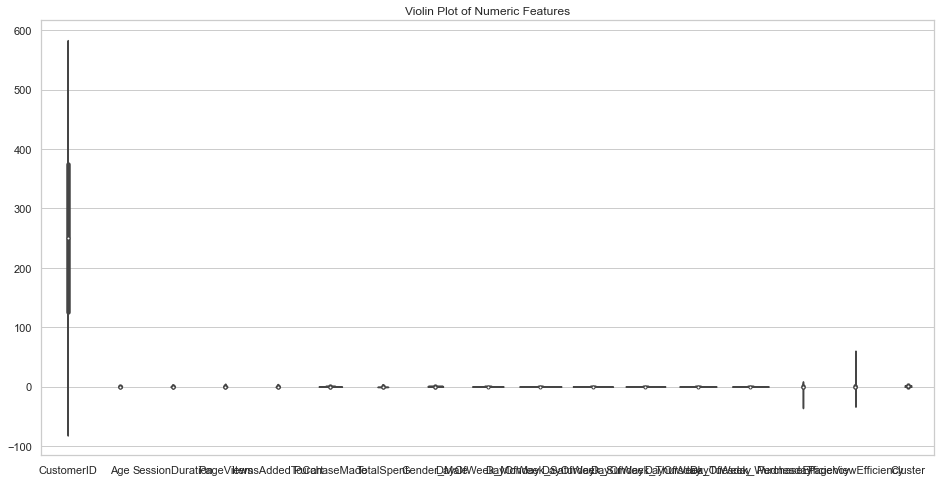

In [40]:
# Violin Plots
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_cleaned.select_dtypes(include=np.number))
plt.title("Violin Plot of Numeric Features")
plt.show()

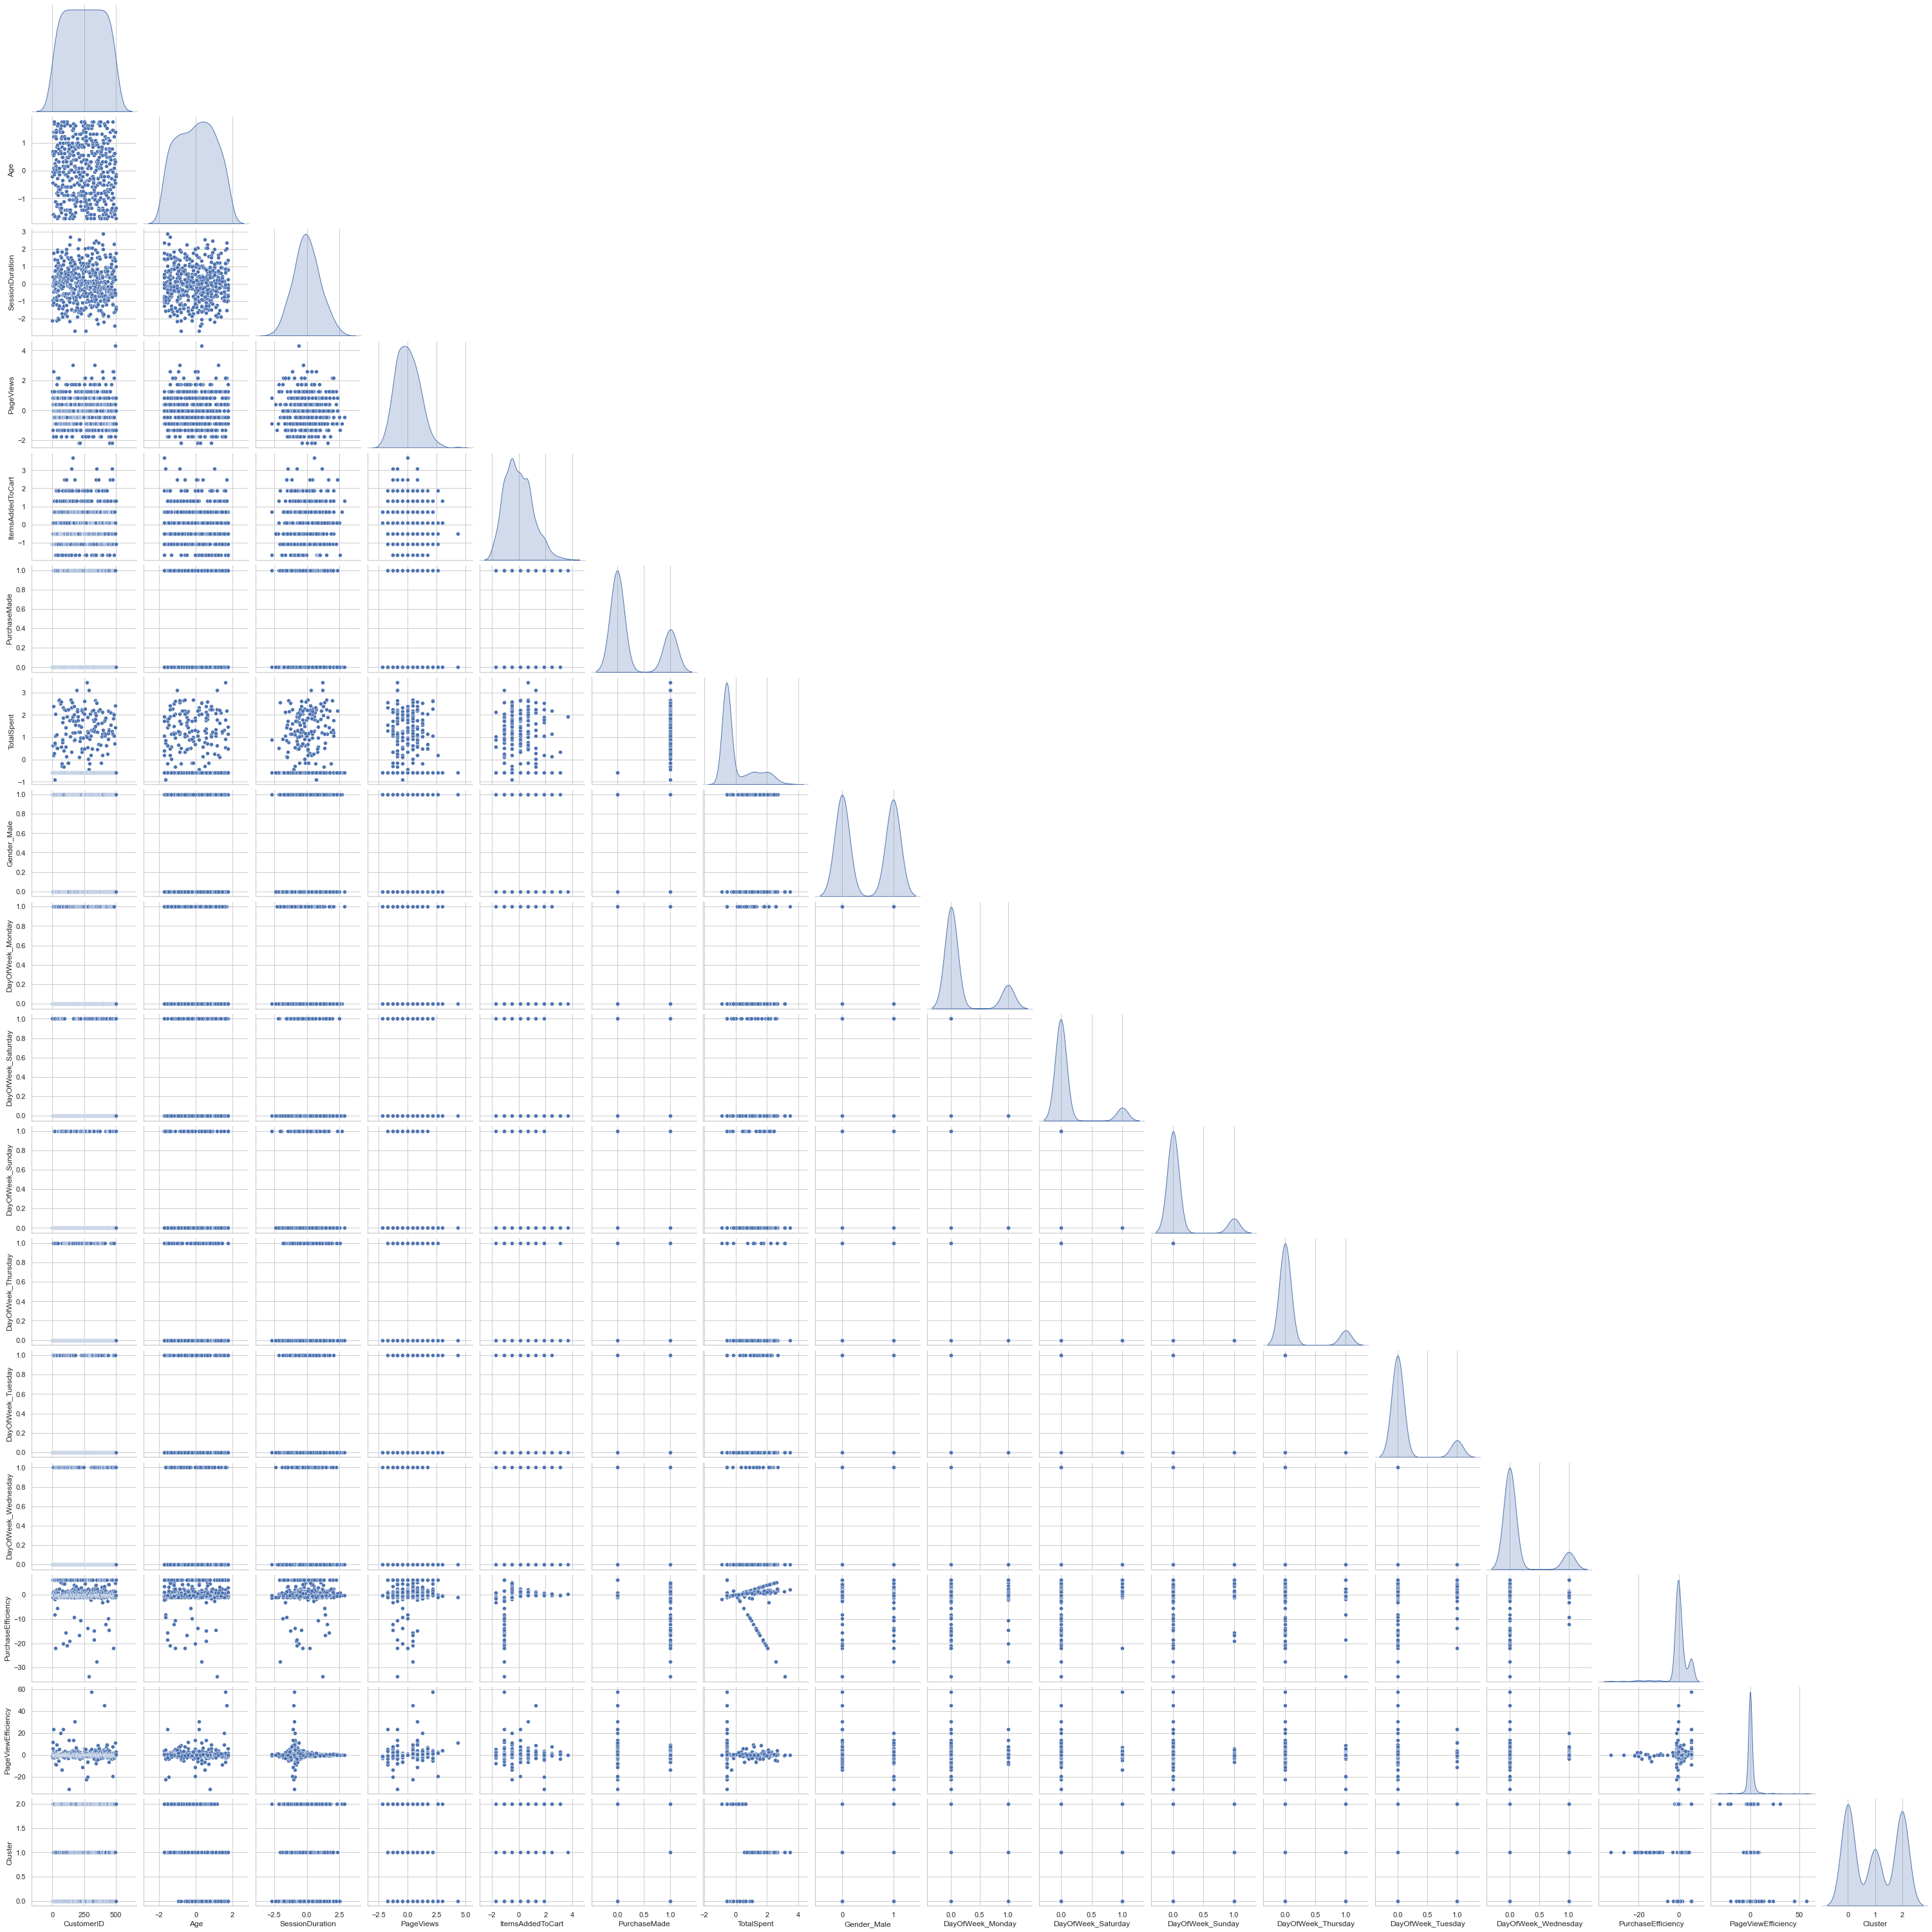

In [41]:
# pairplot Plots
sns.pairplot(df_cleaned.select_dtypes(include=np.number), diag_kind="kde", corner=True)
plt.show()